# <b><span style='color:#F1A424'>AutoML - Binary Classification - Bank Churn Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used - Bank Churn Dataset**

**Features**:

- `customer_id`: customer_id .
- `credit_score`: credit score of customer.
- `country`: country of customer.
- `gender`: Gender of customer.
- `age`: Age of customer.
- `tenure`: tenure.
- `balance`: bank balance.
- `products_number`: products number.
- `credit_card`: having credit card or not.
- `active_member`: active member or not.
- `estimated_salary`: Estimated salary of customer..

**Target Variable**:

- `churn`: 1 if the client has left the bank during some period or 0 if he/she has not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the Customer Churn for ABC Bank.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Binning on 'Age' feature :
    - Aim is to treat 'Age' as categorical variable rather than numerical and check how different age group people will impact prediction.
- Target encoding on 'gender' feature :
    - Aim is to get gender feature encoded with help of target column distribution rather than default encoding i.e., one-hot encoding.
- Deletion of id column 'customer_id' using antiselect.
- Feature scaling using 'std' method. 

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bank_churn')

In [5]:
# Fetching in teradata dataframe
bank_df = DataFrame("bank_churn")

In [6]:
# first 5 rows
bank_df.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [7]:
# bank_df dataset
bank_df.shape

(10000, 12)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
bank_df_sample = bank_df.sample(frac = [0.8, 0.2])

In [9]:
bank_df_sample.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,sampleid
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0,2
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0,1
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0,1
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0,1
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0,2
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0,1
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0,1
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0,2
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0,1


In [10]:
# Fetching train and test data
bank_df_train= bank_df_sample[bank_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bank_df_test = bank_df_sample[bank_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
bank_df_train.shape

(8000, 12)

In [12]:
# test data shape
bank_df_test.shape

(2000, 12)

In [13]:
#train dataset
bank_df_train.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15566091,545,Spain,Female,32,4,0.0,1,1,0,94739.2,0
15566139,526,France,Female,37,5,53573.18,1,1,0,62830.97,0
15566030,497,Germany,Male,41,5,80542.81,1,0,0,88729.22,1
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [14]:
# test dataset
bank_df_test.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0
15566292,574,Spain,Male,36,1,0.0,2,0,1,71709.12,0
15566467,683,Germany,Female,32,0,138171.1,2,1,1,188203.58,0
15566790,598,France,Male,28,8,129991.76,2,0,1,46041.08,0
15566894,793,France,Male,39,3,137817.52,1,0,0,83997.79,0
15567328,738,Spain,Male,38,5,177997.07,1,0,1,19233.41,0
15566891,584,Germany,Female,41,3,88594.93,1,1,0,178997.89,0
15566111,596,France,Male,39,9,0.0,1,1,0,48963.59,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0


In [18]:
AutoClassifier.generate_custom_config("custom_bank_churn")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  1



Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Features

Index 8: Back to main menu

Index 9: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in feature engineering phase:  2,4,7,8



Customizing Bincode Encoding ...

Provide the following details to customize binning and coding encoding:

Available binning methods with corresponding indices:
Index 1: Equal-Width
Index 2: Variable-Width



Enter the feature or list of features for binning:  age

Enter the index of corresponding binning method for feature age:  2

Enter the number of bins for feature age:  3



Available value type of feature for variable binning with corresponding indices:
Index 1: int
Index 2: float

Provide the range for bin 1 of feature age: 



Enter the index of corresponding value type of feature age:  1

Enter the minimum value for bin 1 of feature age:  0

Enter the maximum value for bin 1 of feature age:  29

Enter the label for bin 1 of feature age:  young



Provide the range for bin 2 of feature age: 



Enter the index of corresponding value type of feature age:  1

Enter the minimum value for bin 2 of feature age:  30

Enter the maximum value for bin 2 of feature age:  59

Enter the label for bin 2 of feature age:  adult



Provide the range for bin 3 of feature age: 



Enter the index of corresponding value type of feature age:  1

Enter the minimum value for bin 3 of feature age:  60

Enter the maximum value for bin 3 of feature age:  120

Enter the label for bin 3 of feature age:  old



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of bincode encoding has been completed successfully.

Customizing Categorical Encoding ...

Provide the following details to customize categorical encoding:

Available categorical encoding methods with corresponding indices:
Index 1: OneHotEncoding
Index 2: OrdinalEncoding
Index 3: TargetEncoding



Enter the list of corresponding index categorical encoding methods you want to use:  3

Enter the feature or list of features for TargetEncoding:  gender



Available target encoding methods with corresponding indices:
Index 1: CBM_BETA
Index 2: CBM_DIRICHLET
Index 3: CBM_GAUSSIAN_INVERSE_GAMMA



Enter the index of target encoding method for feature gender:  1

Enter the response column for target encoding method for feature gender:  churn



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of categorical encoding has been completed successfully.

Customizing Antiselect Features ...



Enter the feature or list of features for antiselect:  customer_id



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of antiselect features has been completed successfully.

Customization of feature engineering phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  3



Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  6



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of feature scaling has been completed successfully.

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  5



Customization of data preparation phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_bank_churn.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [19]:
# Creating AutoClassifier instance
# Excluding svm and glm from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-RECALL', early stopping timer threshold to 100 sec
# Using verbose level 2 for detailed loggging
# Passing custom json file to provide customized value for AutoML.

aml = AutoClassifier(exclude=['svm', 'glm'],
                     stopping_metric='MICRO-RECALL', 
                     stopping_tolerance=0.60,
                     max_runtime_secs=100,
                     verbose=2,
                     custom_config_file='custom_bank_churn.json')


Received below input for customization : 
{
    "BincodeIndicator": true,
    "BincodeParam": {
        "age": {
            "Type": "Variable-Width",
            "NumOfBins": 3,
            "Bin_1": {
                "min_value": 0,
                "max_value": 29,
                "label": "young"
            },
            "Bin_2": {
                "min_value": 30,
                "max_value": 59,
                "label": "adult"
            },
            "Bin_3": {
                "min_value": 60,
                "max_value": 120,
                "label": "old"
            }
        }
    },
    "CategoricalEncodingIndicator": true,
    "CategoricalEncodingParam": {
        "TargetEncodingIndicator": true,
        "TargetEncodingList": {
            "gender": {
                "encoder_method": "CBM_BETA",
                "response_column": "churn"
            }
        }
    },
    "AntiselectIndicator": true,
    "AntiselectParam": {
        "excluded_columns": [
            "c

Feature Exploration started ...

Data Overview:
Total Rows in the data: 8000
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
tenure,BIGINT,8000,0,None,330,7670,0,0.0,100.0
active_member,BIGINT,8000,0,None,3866,4134,0,0.0,100.0
churn,BIGINT,8000,0,None,6347,1653,0,0.0,100.0
age,INTEGER,8000,0,None,0,8000,0,0.0,100.0
gender,VARCHAR(20) CHARACTER SET LATIN,8000,0,0,None,None,None,0.0,100.0
customer_id,BIGINT,8000,0,None,0,8000,0,0.0,100.0
estimated_salary,FLOAT,8000,0,None,0,8000,0,0.0,100.0
balance,FLOAT,8000,0,None,2906,5094,0,0.0,100.0
products_number,BIGINT,8000,0,None,0,8000,0,0.0,100.0
credit_card,BIGINT,8000,0,None,2351,5649,0,0.0,100.0


        customer_id  credit_score       age    tenure     balance  products_number  credit_card  active_member  estimated_salary     churn
func                                                                                                                                      
std    7.204971e+04        96.708    10.476     2.895   62439.369            0.583        0.456          0.500         57434.007     0.405
25%    1.562819e+07       584.000    32.000     3.000       0.000            1.000        0.000          0.000         51364.125     0.000
50%    1.569074e+07       652.000    37.000     5.000   96986.030            1.000        1.000          1.000        100565.590     0.000
75%    1.575281e+07       718.000    44.000     7.000  127621.900            2.000        1.000          1.000        149595.113     0.000
max    1.581569e+07       850.000    92.000    10.000  250898.090            4.000        1.000          1.000        199970.740     1.000
min    1.556570e+07       3

func,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
50%,15690743.5,652,37,5,96986.03,1,1,1,100565.59,0
count,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000
mean,15690753.432,650.381,38.948,5.013,76263.531,1.532,0.706,0.517,100200.787,0.207
min,15565701,350,18,0,0,1,0,0,90.07,0
max,15815690,850,92,10,250898.09,4,1,1,199970.74,1
75%,15752810.75,718,44,7,127621.9,2,1,1,149595.113,0
25%,15628194.75,584,32,3,0,1,0,0,51364.125,0
std,72049.707,96.708,10.476,2.895,62439.369,0.583,0.456,0.5,57434.007,0.405



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
country                   3         
gender                    2         

No Futile columns found.

Target Column Distribution:


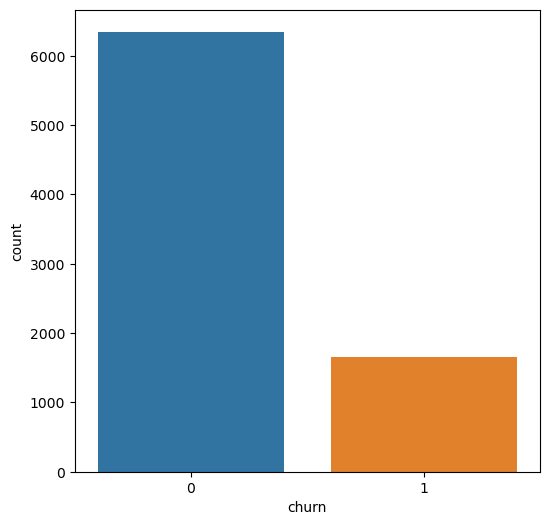

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        ColumnName  OutlierPercentage
0              age             3.5625
1  products_number             0.6500
2     credit_score             0.1625
3            churn            20.6625


Analysis completed. No action taken.                                                    


credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
569,Spain,Female,34,3,0.0,1,1,0,133997.53,0
721,Germany,Male,28,9,154475.54,2,0,1,101300.94,1
850,Spain,Female,57,8,126776.3,2,1,1,132298.49,0
515,France,Female,37,0,196853.62,1,1,1,132770.11,0
728,France,Female,46,2,109705.52,1,1,0,20276.87,1
612,France,Female,38,1,0.0,2,1,1,9209.21,0
638,Germany,Male,37,2,89728.86,2,1,1,37294.88,0
639,Germany,Female,46,10,110031.09,2,1,1,133995.59,0
665,Spain,Male,41,8,0.0,2,1,0,132152.32,0
663,Germany,Male,32,3,108586.86,1,1,1,182355.21,0


Analysis indicates all categorical columns are significant. No action Needed.            


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


No information provided for Equal-Width Transformation.                                  


,ColumnName,MinValue,MaxValue,Label
0,age,0,29,young
1,age,30,59,adult
2,age,60,120,old


credit_score,churn,active_member,credit_card,country,products_number,gender,tenure,id,balance,estimated_salary,age
734,0,1,1,France,1,Male,1,1994,118537.47,116912.45,adult
734,0,1,1,Spain,2,Female,3,5859,92636.96,125671.29,adult
734,0,1,0,Germany,2,Female,6,7637,71283.09,38984.37,adult
734,0,1,1,Germany,2,Female,10,2021,91522.04,138835.91,adult
734,0,0,0,Spain,1,Female,2,2611,130404.92,34548.74,adult
734,0,0,0,Spain,2,Female,6,1931,92126.26,112973.34,adult
734,1,0,1,France,1,Female,3,7763,0.0,130805.54,adult
734,1,1,0,Spain,2,Female,3,774,55853.33,94811.85,adult
734,0,0,1,Germany,1,Male,5,567,121898.58,61829.89,adult
734,0,1,1,Spain,1,Female,0,7774,152760.24,48990.5,adult


Skipping customized string manipulation.                                                 


gender,credit_score,churn,age,active_member,credit_card,country,products_number,tenure,id,balance,estimated_salary
0.2530258561170947,530,1,adult,1,0,France,1,4,4829,120905.03,123475.88
0.2530258561170947,549,0,adult,1,1,Germany,2,1,5687,130622.34,128499.94
0.2530258561170947,549,0,adult,0,1,Germany,1,3,420,134985.66,6101.41
0.2530258561170947,549,0,adult,0,0,France,2,4,3791,0.0,139463.57
0.2530258561170947,549,0,young,1,1,France,2,8,5529,0.0,189558.44
0.2530258561170947,549,0,young,1,1,Spain,2,9,6762,0.0,14406.41
0.16827359621091076,631,1,adult,0,0,Germany,2,8,1902,138292.64,152422.91
0.16827359621091076,631,0,adult,1,1,France,1,8,3316,129205.49,79146.36
0.16827359621091076,631,0,adult,0,1,France,2,9,5894,112392.45,24472.23
0.16827359621091076,631,0,adult,0,1,Spain,2,7,1503,0.0,181605.85


['age', 'country']


gender,credit_score,churn,age_0,age_1,age_2,active_member,credit_card,country_0,country_1,country_2,products_number,tenure,id,balance,estimated_salary
0.16827359621091076,631,0,1,0,0,0,1,1,0,0,1,8,1407,100654.8,171587.9
0.16827359621091076,631,0,0,0,1,0,1,0,0,1,2,3,3797,0.0,13813.24
0.16827359621091076,631,0,0,0,1,1,1,1,0,0,2,2,748,0.0,18581.84
0.16827359621091076,631,0,0,0,1,1,1,0,0,1,2,3,3918,0.0,197963.46
0.16827359621091076,751,0,0,0,1,0,1,1,0,0,1,1,2230,135536.5,66825.33
0.16827359621091076,751,0,1,0,0,0,1,0,0,1,1,4,7427,79281.61,117547.76
0.2530258561170947,530,1,1,0,0,1,0,1,0,0,1,4,4829,120905.03,123475.88
0.2530258561170947,549,0,1,0,0,1,1,0,1,0,2,1,5687,130622.34,128499.94
0.2530258561170947,549,0,1,0,0,0,1,0,1,0,1,3,420,134985.66,6101.41
0.2530258561170947,549,0,1,0,0,0,0,1,0,0,2,4,3791,0.0,139463.57


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


No information provided for performing customized imbalanced dataset sampling. AutoML will Proceed with default option.


No information provided for customized outlier processing. AutoML will proceed with default settings.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        ColumnName  OutlierPercentage
0  products_number             0.6500
1            churn            20.6625
2     credit_score             0.1625


['credit_score', 'products_number']


gender,credit_score,churn,age_0,age_1,age_2,active_member,credit_card,country_0,country_1,country_2,products_number,tenure,id,balance,estimated_salary
0.2530258561170947,549,0,0,0,1,1,1,0,0,1,2,9,6762,0.0,14406.41
0.2530258561170947,549,1,1,0,0,1,0,0,1,0,2,1,6204,137592.31,116548.02
0.2530258561170947,549,0,1,0,0,1,1,1,0,0,1,7,2382,0.0,109057.56
0.2530258561170947,549,0,1,0,0,1,0,0,1,0,1,6,3050,124829.16,93551.36
0.2530258561170947,608,0,1,0,0,1,1,0,1,0,2,8,1404,103653.51,137079.86
0.2530258561170947,608,0,1,0,0,0,0,1,0,0,1,8,7955,85859.76,142730.27
0.16827359621091076,631,0,1,0,0,0,1,1,0,0,1,8,1407,100654.8,171587.9
0.16827359621091076,631,0,0,0,1,0,1,0,0,1,2,3,3797,0.0,13813.24
0.16827359621091076,631,0,0,0,1,1,1,1,0,0,2,2,748,0.0,18581.84
0.16827359621091076,631,0,0,0,1,1,1,0,0,1,2,3,3918,0.0,197963.46


['credit_score', 'country_1', 'age_2', 'age_0', 'active_member', 'credit_card', 'products_number', 'country_2', 'gender', 'tenure', 'country_0', 'balance', 'estimated_salary', 'age_1']


['credit_score', 'active_member', 'credit_card', 'products_number', 'gender', 'tenure', 'balance', 'estimated_salary']


churn,country_1,age_2,age_0,country_2,id,country_0,age_1,credit_score,active_member,credit_card,products_number,gender,tenure,balance,estimated_salary
0,1,0,1,0,2,0,0,-1.1026260786744229,1.3148075260699945,-1.2817688953726483,-0.7300008769676279,1.0967456634359403,0.43916493408393953,0.7020454082761981,-0.11761350757832034
0,1,0,1,0,4,0,0,-0.4501295859745322,1.3148075260699945,0.7801718419053136,1.16076246362145,1.0967456634359403,1.1744273547198574,0.3556906432867941,0.6416790631176587
0,0,1,0,0,5,1,0,-0.19576654644745617,-0.7605675965279302,-1.2817688953726483,1.16076246362145,1.0967456634359403,-0.6637286968699371,-1.3396947213361015,-1.2125394377765268
0,0,0,1,0,6,1,0,-0.4501295859745322,-0.7605675965279302,-1.2817688953726483,-0.7300008769676279,1.0967456634359403,1.1744273547198574,0.06465116636258145,0.7402424028694596
0,0,0,1,1,8,0,0,-0.4501295859745322,1.3148075260699945,-1.2817688953726483,-0.7300008769676279,1.0967456634359403,-1.398991117505855,0.031089724693411633,0.2136612263190778
0,0,0,0,0,9,1,1,0.03647796790335238,1.3148075260699945,0.7801718419053136,1.16076246362145,1.0967456634359403,0.07153372376598066,-1.3396947213361015,-1.733136247711274
0,1,1,0,0,7,0,0,1.1313449641285926,1.3148075260699945,0.7801718419053136,1.16076246362145,1.0967456634359403,1.909689775355775,0.8345799814115609,-0.9360814811460579
0,1,1,0,0,3,0,0,-0.19576654644745617,1.3148075260699945,0.7801718419053136,1.16076246362145,1.0967456634359403,-1.031359907187896,0.24463169630144074,-1.1980337112768917
0,0,1,0,0,1,1,0,-0.4501295859745322,1.3148075260699945,0.7801718419053136,1.16076246362145,1.0967456634359403,1.5420585650378162,-1.3396947213361015,0.43204499284615944
1,1,0,1,0,0,0,0,-1.1026260786744229,1.3148075260699945,-1.2817688953726483,1.16076246362145,1.0967456634359403,-1.398991117505855,0.9108030057418961,0.28353041166588516


['products_number', 'tenure', 'country_0', 'credit_score', 'age_2', 'active_member', 'country_2', 'gender', 'balance', 'estimated_salary']


['r_products_number', 'r_tenure', 'r_credit_score', 'r_active_member', 'r_gender', 'r_balance', 'r_estimated_salary']


r_country_2,r_country_0,churn,r_age_2,id,r_products_number,r_tenure,r_credit_score,r_active_member,r_gender,r_balance,r_estimated_salary
0,0,0,0,2,-0.7300008769676279,0.43916493408393953,-1.1026260786744229,1.3148075260699945,1.0967456634359403,0.7020454082761981,-0.11761350757832034
0,0,0,0,4,1.16076246362145,1.1744273547198574,-0.4501295859745322,1.3148075260699945,1.0967456634359403,0.3556906432867941,0.6416790631176587
0,1,0,1,5,1.16076246362145,-0.6637286968699371,-0.19576654644745617,-0.7605675965279302,1.0967456634359403,-1.3396947213361015,-1.2125394377765268
0,1,0,0,6,-0.7300008769676279,1.1744273547198574,-0.4501295859745322,-0.7605675965279302,1.0967456634359403,0.06465116636258145,0.7402424028694596
1,0,0,0,8,-0.7300008769676279,-1.398991117505855,-0.4501295859745322,1.3148075260699945,1.0967456634359403,0.031089724693411633,0.2136612263190778
0,1,0,0,9,1.16076246362145,0.07153372376598066,0.03647796790335238,1.3148075260699945,1.0967456634359403,-1.3396947213361015,-1.733136247711274
0,0,0,1,7,1.16076246362145,1.909689775355775,1.1313449641285926,1.3148075260699945,1.0967456634359403,0.8345799814115609,-0.9360814811460579
0,0,0,1,3,1.16076246362145,-1.031359907187896,-0.19576654644745617,1.3148075260699945,1.0967456634359403,0.24463169630144074,-1.1980337112768917
0,1,0,1,1,1.16076246362145,1.5420585650378162,-0.4501295859745322,1.3148075260699945,1.0967456634359403,-1.3396947213361015,0.43204499284615944
0,0,1,0,0,1.16076246362145,-1.398991117505855,-1.1026260786744229,1.3148075260699945,1.0967456634359403,0.9108030057418961,0.28353041166588516


['gender', 'credit_score', 'active_member', 'credit_card', 'products_number', 'tenure', 'balance', 'estimated_salary']


churn,country_1,age_2,age_0,country_2,id,country_0,age_1,gender,credit_score,active_member,credit_card,products_number,tenure,balance,estimated_salary
0,0,1,0,1,6762,0,0,1.1022267062508027,-1.059473525258057,0.966293535568315,0.6450824247806599,0.8807080930690419,1.3779471226131137,-1.2199992998727713,-1.491982625560265
1,1,0,1,0,6204,0,0,1.1022267062508027,-1.059473525258057,0.966293535568315,-1.5501894976289958,0.8807080930690419,-1.3863941078498487,0.983372498976856,0.28628450562299856
0,0,0,1,0,2382,1,0,1.1022267062508027,-1.059473525258057,0.966293535568315,0.6450824247806599,-0.9384744750194318,0.6868618149973731,-1.2199992998727713,0.15587693895704333
0,1,0,1,0,3050,0,0,1.1022267062508027,-1.059473525258057,0.966293535568315,-1.5501894976289958,-0.9384744750194318,0.3413191611895028,0.7789863325225853,-0.11408322506968308
0,1,0,1,0,1404,0,0,1.1022267062508027,-0.4455448670691243,0.966293535568315,0.6450824247806599,0.8807080930690419,1.0324044688052434,0.4398843141589854,0.6437401616941506
0,0,0,1,0,7955,1,0,1.1022267062508027,-0.4455448670691243,-1.0348822207652306,-1.5501894976289958,-0.9384744750194318,1.0324044688052434,0.15493926929579094,0.7421127875095185
0,0,0,1,0,1407,1,0,-0.907254373650125,-0.20621674608021837,-1.0348822207652306,0.6450824247806599,-0.9384744750194318,1.0324044688052434,0.39186365772165727,1.244518955895234
0,0,1,0,1,3797,0,0,-0.907254373650125,-0.20621674608021837,-1.0348822207652306,0.6450824247806599,0.8807080930690419,-0.6953088002341081,-1.2199992998727713,-1.5023096089924235
0,0,1,0,0,748,1,0,-0.907254373650125,-0.20621674608021837,0.966293535568315,0.6450824247806599,0.8807080930690419,-1.0408514540419784,-1.2199992998727713,-1.4192891372986594
0,0,1,0,1,3918,0,0,-0.907254373650125,-0.20621674608021837,0.966293535568315,0.6450824247806599,0.8807080930690419,-0.6953088002341081,-1.2199992998727713,1.7037127302497996


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


                                                                                          
Skipping customized hyperparameter tuning


response_column : churn                                                                                                                               
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.1, 0.2)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
iter_num : (10, 30, 40)
seed : 42
Total number of models for xgboost : 3456
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : churn
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.2, 0.3)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
num_trees : (-1, 30, 40)
seed : 42
Total number of models for decision_forest : 108
-------------------------------------------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,KNN_9,lasso,0.837731,0.837731,0.837731,0.837731,0.837897,0.837727,0.837710,0.837894,0.837731,0.837711
1,2,KNN_0,lasso,0.834187,0.834187,0.834187,0.834187,0.834504,0.834181,0.834146,0.834500,0.834187,0.834147
2,3,KNN_4,rfe,0.825916,0.825916,0.825916,0.825916,0.826509,0.825907,0.825834,0.826504,0.825916,0.825835
3,4,DECISIONFOREST_3,lasso,0.820796,0.820796,0.820796,0.820796,0.821353,0.820804,0.820720,0.821359,0.820796,0.820719
4,5,XGBOOST_2,pca,0.818640,0.818640,0.818640,0.818640,0.716248,0.634388,0.655946,0.795369,0.818640,0.797782
5,6,DECISIONFOREST_2,pca,0.807935,0.807935,0.807935,0.807935,0.718487,0.544013,0.534582,0.775946,0.807935,0.748412
6,7,DECISIONFOREST_1,rfe,0.793620,0.793620,0.793620,0.793620,0.797885,0.793643,0.792887,0.797899,0.793620,0.792882
7,8,KNN_8,pca,0.778338,0.778338,0.778338,0.778338,0.624802,0.587976,0.597757,0.749093,0.778338,0.759329
8,9,DECISIONFOREST_0,lasso,0.767625,0.767625,0.767625,0.767625,0.793952,0.767684,0.762329,0.793987,0.767625,0.762315
9,10,XGBOOST_1,rfe,0.715242,0.715242,0.715242,0.715242,0.780147,0.715147,0.697677,0.780094,0.715242,0.697706


In [20]:
# Fitting train data
aml.fit(bank_df_train, bank_df_train.churn)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [21]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,KNN_9,lasso,0.837731,0.837731,0.837731,0.837731,0.837897,0.837727,0.837710,0.837894,0.837731,0.837711
1,2,KNN_0,lasso,0.834187,0.834187,0.834187,0.834187,0.834504,0.834181,0.834146,0.834500,0.834187,0.834147
2,3,KNN_4,rfe,0.825916,0.825916,0.825916,0.825916,0.826509,0.825907,0.825834,0.826504,0.825916,0.825835
3,4,DECISIONFOREST_3,lasso,0.820796,0.820796,0.820796,0.820796,0.821353,0.820804,0.820720,0.821359,0.820796,0.820719
4,5,XGBOOST_2,pca,0.818640,0.818640,0.818640,0.818640,0.716248,0.634388,0.655946,0.795369,0.818640,0.797782
5,6,DECISIONFOREST_2,pca,0.807935,0.807935,0.807935,0.807935,0.718487,0.544013,0.534582,0.775946,0.807935,0.748412
6,7,DECISIONFOREST_1,rfe,0.793620,0.793620,0.793620,0.793620,0.797885,0.793643,0.792887,0.797899,0.793620,0.792882
7,8,KNN_8,pca,0.778338,0.778338,0.778338,0.778338,0.624802,0.587976,0.597757,0.749093,0.778338,0.759329
8,9,DECISIONFOREST_0,lasso,0.767625,0.767625,0.767625,0.767625,0.793952,0.767684,0.762329,0.793987,0.767625,0.762315
9,10,XGBOOST_1,rfe,0.715242,0.715242,0.715242,0.715242,0.780147,0.715147,0.697677,0.780094,0.715242,0.697706


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [22]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,KNN_9,lasso,0.837731,0.837731,0.837731,0.837731,0.837897,0.837727,0.83771,0.837894,0.837731,0.837711


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [23]:
aml.model_hyperparameters(rank=1)

{'response_column': 'churn',
 'name': 'knn',
 'model_type': 'Classification',
 'k': 5,
 'id_column': 'id',
 'voting_weight': 1.0,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0']}

In [24]:
aml.model_hyperparameters(rank=4)

{'response_column': 'churn',
 'name': 'decision_forest',
 'tree_type': 'Classification',
 'min_impurity': 0.0,
 'max_depth': 5,
 'min_node_size': 1,
 'num_trees': 30,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0']}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [25]:
# Generating prediction on test data
prediction = aml.predict(bank_df_test)

Data Transformation started ...


credit_score,age,customer_id,active_member,credit_card,country,products_number,gender,tenure,id,balance,estimated_salary,churn
710,62,15704053,0,1,Spain,2,Male,3,9,131078.42,119348.76,1
778,44,15701096,0,1,France,1,Male,8,11,123863.64,144494.94,0
826,29,15752463,1,0,Spain,1,Female,4,19,129938.07,190200.53,0
507,34,15768777,1,1,Spain,2,Female,4,13,0.0,60688.38,0
446,45,15684395,1,1,Spain,1,Female,10,12,125191.69,128260.86,1
705,30,15677217,1,1,France,1,Male,1,20,0.0,181300.32,0
681,49,15583863,0,0,Germany,1,Male,8,14,142946.18,187280.51,1
672,28,15694530,1,1,France,1,Male,4,22,167268.98,169469.3,0
648,33,15752137,1,1,France,1,Male,7,15,134944.0,117036.38,0
522,41,15728523,1,1,France,1,Male,5,23,144147.68,14789.9,0


credit_score,churn,customer_id,active_member,credit_card,country,products_number,gender,tenure,id,balance,estimated_salary,age
530,0,15659149,0,1,France,2,Male,2,42,0.0,197923.05,adult
530,0,15605950,1,1,Germany,2,Male,1,1907,137060.88,165227.23,young
530,0,15673619,0,1,France,1,Male,9,503,162560.32,64129.03,young
549,0,15814536,0,0,France,2,Male,2,1177,112541.54,47432.43,adult
549,1,15717398,0,0,Spain,1,Female,7,641,0.0,81259.25,adult
549,0,15647301,1,1,Germany,2,Female,3,1054,143734.01,96404.38,adult
549,0,15622443,1,0,France,2,Male,4,52,0.0,25684.85,adult
530,0,15696834,0,0,France,2,Female,5,1161,0.0,121451.21,young
530,0,15669922,1,1,Spain,2,Female,2,642,0.0,14721.8,adult
530,0,15738546,1,0,Spain,2,Female,4,1384,0.0,147606.71,adult


gender,credit_score,churn,age,customer_id,active_member,credit_card,country,products_number,tenure,id,balance,estimated_salary
0.2530258561170947,669,1,adult,15571869,0,0,Germany,1,4,183,112650.89,166386.22
0.2530258561170947,669,0,adult,15642336,0,0,France,2,9,1615,0.0,135630.32
0.2530258561170947,669,0,adult,15638646,1,1,France,1,1,478,160474.59,95963.14
0.2530258561170947,526,0,adult,15593496,0,0,Spain,1,5,689,91132.18,58111.71
0.2530258561170947,850,0,young,15628308,1,1,France,2,6,1414,0.0,13159.9
0.2530258561170947,850,0,adult,15762793,1,1,Germany,2,0,1390,136980.23,99019.65
0.16827359621091076,774,1,old  ,15714485,0,1,France,1,5,336,85891.55,74135.48
0.16827359621091076,814,0,young,15693683,1,1,Germany,2,8,518,97086.4,197276.13
0.16827359621091076,547,1,adult,15687372,0,1,Germany,2,8,1159,121537.71,46521.45
0.16827359621091076,547,1,adult,15603942,1,0,Germany,3,3,364,81290.02,177747.03


gender,credit_score,churn,age_0,age_1,age_2,customer_id,active_member,credit_card,country_0,country_1,country_2,products_number,tenure,id,balance,estimated_salary
0.2530258561170947,669,0,1,0,0,15638646,1,1,1,0,0,1,1,478,160474.59,95963.14
0.2530258561170947,850,0,0,0,1,15628308,1,1,1,0,0,2,6,1414,0.0,13159.9
0.2530258561170947,850,0,1,0,0,15762793,1,1,0,1,0,2,0,1390,136980.23,99019.65
0.2530258561170947,850,0,1,0,0,15646196,0,0,0,0,1,2,2,253,155180.56,169415.54
0.2530258561170947,850,1,1,0,0,15654562,0,1,0,0,1,4,5,2018,174088.3,5669.31
0.2530258561170947,850,0,0,0,1,15642991,0,1,0,0,1,2,7,320,0.0,23237.25
0.16827359621091076,547,1,1,0,0,15687372,0,1,0,1,0,2,8,1159,121537.71,46521.45
0.16827359621091076,669,0,1,0,0,15694125,1,1,1,0,0,2,5,961,0.0,56875.76
0.16827359621091076,669,0,0,0,1,15713160,0,1,0,0,1,2,7,366,157228.61,124382.9
0.16827359621091076,669,0,0,0,1,15808831,1,1,1,0,0,2,7,1742,0.0,138145.62


gender,credit_score,churn,age_0,age_1,age_2,active_member,credit_card,country_0,country_1,country_2,products_number,tenure,id,balance,estimated_salary
0.2530258561170947,669,0,1,0,0,1,1,1,0,0,1,1,478,160474.59,95963.14
0.2530258561170947,850,0,0,0,1,1,1,1,0,0,2,6,1414,0.0,13159.9
0.2530258561170947,850,0,1,0,0,1,1,0,1,0,2,0,1390,136980.23,99019.65
0.2530258561170947,850,0,1,0,0,0,0,0,0,1,2,2,253,155180.56,169415.54
0.2530258561170947,850,1,1,0,0,0,1,0,0,1,4,5,2018,174088.3,5669.31
0.2530258561170947,850,0,0,0,1,0,1,0,0,1,2,7,320,0.0,23237.25
0.16827359621091076,547,1,1,0,0,0,1,0,1,0,2,8,1159,121537.71,46521.45
0.16827359621091076,669,0,1,0,0,1,1,1,0,0,2,5,961,0.0,56875.76
0.16827359621091076,669,0,0,0,1,0,1,0,0,1,2,7,366,157228.61,124382.9
0.16827359621091076,669,0,0,0,1,1,1,1,0,0,2,7,1742,0.0,138145.62


id,credit_score,country_1,age_2,age_0,active_member,credit_card,products_number,country_2,gender,tenure,country_0,balance,estimated_salary,age_1,churn
1834,631,1,1,0,1,1,1,0,0.253,6,0,139129.92,63747.51,0,0
1187,461,0,1,0,1,1,1,0,0.253,8,1,0.0,103349.74,0,0
1222,461,0,1,0,1,1,2,1,0.253,6,0,0.0,15306.29,0,0
1021,583,0,1,0,1,1,1,0,0.253,1,1,125406.58,110784.42,0,0
1674,568,1,1,0,0,1,2,0,0.253,10,0,109819.16,154491.39,0,0
407,690,0,1,0,0,1,1,0,0.253,3,1,118097.87,61257.83,0,0
478,669,0,0,1,1,1,1,0,0.253,1,1,160474.59,95963.14,0,0
1390,850,1,0,1,1,1,2,0,0.253,0,0,136980.23,99019.65,0,0
253,850,0,0,1,0,0,2,1,0.253,2,0,155180.56,169415.54,0,0
2031,850,0,0,1,1,0,1,0,0.253,3,1,212778.2,69372.88,0,0


churn,country_1,age_2,age_0,country_2,id,country_0,age_1,credit_score,active_member,credit_card,products_number,gender,tenure,balance,estimated_salary
0,0,0,1,1,253,0,0,2.226211960353833,-0.7605675965279302,-1.2817688953726483,1.16076246362145,1.0967456634359403,-1.031359907187896,1.1984812680537913,1.2057288602023866
0,1,0,1,0,63,0,0,2.226211960353833,1.3148075260699945,0.7801718419053136,1.16076246362145,1.0967456634359403,-0.6637286968699371,0.7811978415460278,-0.20147121748302016
0,0,0,1,1,1741,0,0,2.226211960353833,1.3148075260699945,0.7801718419053136,-0.7300008769676279,1.0967456634359403,-1.031359907187896,0.7131948270238011,-0.3699742146168608
0,1,0,1,0,1696,0,0,2.226211960353833,-0.7605675965279302,-1.2817688953726483,-0.7300008769676279,1.0967456634359403,-0.6637286968699371,-0.5007245953970613,-1.1296317048616176
0,0,0,1,0,370,1,0,2.226211960353833,-0.7605675965279302,-1.2817688953726483,1.16076246362145,1.0967456634359403,0.8067961444018984,-1.3396947213361015,0.9582300258519555
0,1,0,1,0,250,0,0,2.226211960353833,-0.7605675965279302,0.7801718419053136,-0.7300008769676279,1.0967456634359403,0.43916493408393953,0.49160278730996015,0.19993697189330661
0,0,1,0,1,1902,0,0,0.8548633994252491,1.3148075260699945,-1.2817688953726483,-0.7300008769676279,1.0967456634359403,0.8067961444018984,0.685638591899217,-0.37195440903259785
0,0,1,0,0,21,1,0,-0.7708482010304106,-0.7605675965279302,0.7801718419053136,1.16076246362145,1.0967456634359403,1.5420585650378162,-1.3396947213361015,0.4630366402611663
0,1,1,0,0,1834,0,0,-0.19576654644745617,1.3148075260699945,0.7801718419053136,-0.7300008769676279,1.0967456634359403,0.43916493408393953,0.93595257849151,-0.6374991430387051
1,0,0,0,0,1470,1,1,1.1092264389523252,-0.7605675965279302,0.7801718419053136,-0.7300008769676279,1.0967456634359403,0.43916493408393953,-1.3396947213361015,-1.4358710738069893


id,products_number,tenure,country_0,credit_score,age_2,active_member,country_2,gender,balance,estimated_salary,churn
1834,1,6,0,631,1,1,0,0.253,139129.92,63747.51,0
1187,1,8,1,461,1,1,0,0.253,0.0,103349.74,0
1222,2,6,0,461,1,1,1,0.253,0.0,15306.29,0
1021,1,1,1,583,1,1,0,0.253,125406.58,110784.42,0
1674,2,10,0,568,1,0,0,0.253,109819.16,154491.39,0
407,1,3,1,690,1,0,0,0.253,118097.87,61257.83,0
478,1,1,1,669,0,1,0,0.253,160474.59,95963.14,0
1390,2,0,0,850,0,1,0,0.253,136980.23,99019.65,0
253,2,2,0,850,0,0,1,0.253,155180.56,169415.54,0
2031,1,3,1,850,0,1,0,0.253,212778.2,69372.88,0


churn,r_country_0,r_country_2,r_age_2,id,r_products_number,r_tenure,r_credit_score,r_active_member,r_gender,r_balance,r_estimated_salary
0,0,1,0,253,1.16076246362145,-1.031359907187896,2.226211960353833,-0.7605675965279302,1.0967456634359403,1.1984812680537913,1.2057288602023866
0,0,0,0,63,1.16076246362145,-0.6637286968699371,2.226211960353833,1.3148075260699945,1.0967456634359403,0.7811978415460278,-0.20147121748302016
0,0,1,0,1741,-0.7300008769676279,-1.031359907187896,2.226211960353833,1.3148075260699945,1.0967456634359403,0.7131948270238011,-0.3699742146168608
0,0,0,0,1696,-0.7300008769676279,-0.6637286968699371,2.226211960353833,-0.7605675965279302,1.0967456634359403,-0.5007245953970613,-1.1296317048616176
0,1,0,0,370,1.16076246362145,0.8067961444018984,2.226211960353833,-0.7605675965279302,1.0967456634359403,-1.3396947213361015,0.9582300258519555
0,0,0,0,250,-0.7300008769676279,0.43916493408393953,2.226211960353833,-0.7605675965279302,1.0967456634359403,0.49160278730996015,0.19993697189330661
0,0,1,1,1902,-0.7300008769676279,0.8067961444018984,0.8548633994252491,1.3148075260699945,1.0967456634359403,0.685638591899217,-0.37195440903259785
0,1,0,1,21,1.16076246362145,1.5420585650378162,-0.7708482010304106,-0.7605675965279302,1.0967456634359403,-1.3396947213361015,0.4630366402611663
0,0,0,1,1834,-0.7300008769676279,0.43916493408393953,-0.19576654644745617,1.3148075260699945,1.0967456634359403,0.93595257849151,-0.6374991430387051
1,1,0,0,1470,-0.7300008769676279,0.43916493408393953,1.1092264389523252,-0.7605675965279302,1.0967456634359403,-1.3396947213361015,-1.4358710738069893


churn,country_1,age_2,age_0,country_2,id,country_0,age_1,gender,credit_score,active_member,credit_card,products_number,tenure,balance,estimated_salary
0,0,0,1,1,253,0,0,1.1016136561898482,2.0726031885532774,-1.0348822207652306,-1.5501894976289958,0.8807080930690419,-1.0408514540419784,1.2650267138171836,1.206698557478788
0,1,0,1,0,63,0,0,1.1016136561898482,2.0726031885532774,0.966293535568315,0.6450824247806599,0.8807080930690419,-0.6953088002341081,0.8564812960493915,-0.19777867551770792
0,0,0,1,1,1741,0,0,1.1016136561898482,2.0726031885532774,0.966293535568315,0.6450824247806599,-0.9384744750194318,-1.0408514540419784,0.7899022799356628,-0.36595562982502594
0,1,0,1,0,1696,0,0,1.1016136561898482,2.0726031885532774,-1.0348822207652306,-1.5501894976289958,-0.9384744750194318,-0.6953088002341081,-0.39859739693837487,-1.1241432300409913
0,0,0,1,0,370,1,0,1.1016136561898482,2.0726031885532774,-1.0348822207652306,-1.5501894976289958,0.8807080930690419,0.6868618149973731,-1.2199992998727713,0.9596786179900821
0,1,0,1,0,250,0,0,1.1016136561898482,2.0726031885532774,-1.0348822207652306,0.6450824247806599,-0.9384744750194318,0.3413191611895028,0.5729504273386029,0.20285281396081445
0,0,1,0,1,1902,0,0,1.1016136561898482,0.7823124493087409,0.966293535568315,-1.5501894976289958,-0.9384744750194318,0.6868618149973731,0.7629230785681451,-0.36793199268764315
0,0,1,0,0,21,1,0,1.1016136561898482,-0.7473064109247013,-1.0348822207652306,0.6450824247806599,0.8807080930690419,1.3779471226131137,-1.2199992998727713,0.4654434008227607
0,1,1,0,0,1834,0,0,1.1016136561898482,-0.20621674608021837,0.966293535568315,0.6450824247806599,-0.9384744750194318,0.3413191611895028,1.0079954340204584,-0.6329629141377946
1,0,0,0,0,1470,1,1,1.1016136561898482,1.0216405702976468,-1.0348822207652306,0.6450824247806599,-0.9384744750194318,0.3413191611895028,-1.2199992998727713,-1.429790044841085


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,churn
0,478,-1.488329,1.337747,0.564770,0.816043,-1.048429,-0.812509,-0.342880,-0.022034,0.701341,-0.341225,0
1,1902,-1.027224,0.978877,0.638455,-0.750029,-0.326090,1.537832,-1.296074,-0.318449,-0.571017,1.201799,0
2,1390,-0.226023,2.189666,0.415593,-0.277066,-2.146070,-0.498113,0.551505,1.409215,-0.128873,-0.310542,0
3,21,1.604201,-2.043001,0.520217,0.152697,-0.596605,-0.018305,-0.647563,-0.235395,0.537231,1.063817,0
4,253,-0.499834,0.726505,2.030866,-1.964175,-1.089244,0.623379,1.400422,1.179042,-0.457854,-0.140039,0
5,1834,-1.305208,0.358995,-0.153715,0.798144,-0.937596,0.067564,-1.444965,0.253729,-0.160033,1.106527,0
6,2031,-2.117488,2.225015,0.764082,-0.971806,-1.105120,1.451067,-0.164310,0.307747,0.889840,-0.338565,0
7,1470,0.319412,-0.501129,-0.361526,0.682065,-1.806869,1.173368,0.478404,-1.612415,0.337393,0.572715,1
8,63,-0.067492,1.644072,-0.010820,-0.518043,-2.174563,-0.025069,-0.020566,1.342932,-0.145520,-0.320815,0
9,1187,0.536611,-0.830820,0.281892,1.296264,0.266644,-0.552787,-2.231898,-1.469179,0.356955,1.035238,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being picked for evaluation:
Model ID : KNN_9 
Feature Selection Method : lasso

Prediction : 
   id  prediction    prob_1    prob_0  churn
0  22           0  1.000000  0.000000      0
1   8           0  1.000000  0.000000      0
2  18           1  0.444394  0.555606      1
3  12           0  1.000000  0.000000      1
4  41           0  0.871337  0.128663      0
5  48           1  0.389793  0.610207      0
6  28           0  1.000000  0.000000      0
7  31           0  1.000000  0.000000      0
8  10           1  0.000000  1.000000      1
9  15           0  0.502472  0.497528      0

ROC-AUC : 


AUC,GINI
0.20901177031765678,-0.5819764593646864


threshold_value,tpr,fpr
0.04081632653061224,0.8203125,0.9777227722772277
0.08163265306122448,0.8203125,0.9777227722772277
0.1020408163265306,0.8177083333333334,0.9771039603960396
0.12244897959183673,0.8125,0.9771039603960396
0.16326530612244897,0.7760416666666666,0.9721534653465347
0.18367346938775508,0.7395833333333334,0.9573019801980198
0.14285714285714285,0.7916666666666666,0.9758663366336634
0.061224489795918366,0.8203125,0.9777227722772277
0.02040816326530612,0.8203125,0.9777227722772277
0.0,1.0,1.0



Confusion Matrix : 


array([[1334,  282],
       [ 170,  214]], dtype=int64)

In [26]:
# Printing prediction
prediction.head()

id,prediction,prob_1,prob_0,churn
10,1,0.0,1.0,1
12,0,1.0,0.0,1
13,0,1.0,0.0,0
14,1,0.22809253174082206,0.771907468259178,1
16,0,1.0,0.0,0
17,1,0.34971023695152625,0.6502897630484737,1
15,0,0.5024716296543856,0.4975283703456145,0
11,0,0.8375185508227423,0.16248144917725774,0
9,1,0.0,1.0,1
8,0,1.0,0.0,0


In [27]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(bank_df_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : KNN_9 
Feature Selection Method : lasso

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1     1334      170   0.886968  0.825495  0.855128     1616
1               1  CLASS_2      282      214   0.431452  0.557292  0.486364      384
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.774000
1       5     Macro-Precision     0.659210
2       6        Macro-Recall     0.691393
3       7            Macro-F1     0.670746
4       9     Weighted-Recall     0.774000
5      10         Weighted-F1     0.784325
6       8  Weighted-Precision     0.799509
7       4            Micro-F1     0.774000
8     

In [28]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,Precision,Recall,F1,Support
0,0,CLASS_1,1334,170,0.886968085106383,0.8254950495049505,0.8551282051282051,1616
1,1,CLASS_2,282,214,0.4314516129032258,0.5572916666666666,0.4863636363636363,384


## <b><span style='color:#F1A424'>| 7.</span> Deploy Trained Model : </b>

#### 7.1. Deploy top 5 models

In [29]:
aml.deploy(table_name='churn_top_5_models', top_n=5)

Model Deployment Completed Successfully.


#### 7.2. Deploy models using list of model ranks

In [30]:
aml.deploy(table_name='churn_mixed_models', ranks=[5, 7, 10])

Model Deployment Completed Successfully.


#### 7.3. Deploy models using range of model rank

In [31]:
aml.deploy(table_name='churn_range_models', ranks=range(8,12))

Model Deployment Completed Successfully.


##### Note: 
 - After deployment, saved models can be loaded in same session or different session using table name. After loading models can be used for predict and evaluate. Please refer to notebook: `Binary_Classification__Bank_Churn_Prediction_Load_Models` for more details.

In [32]:
remove_context()

True